## Bibliotecas

In [ ]:
import numpy as np
from numpy import linalg
import math
import matplotlib.pyplot as plt

## Forma de Lagrange

In [ ]:
def lagrange(m, x, y, z):
  r = 0
  for i in range(0, m):
    c = 1
    d = 1

    for j in range(0, m):
      if i != j:
        c = c * (z - x[j])
        d = d * (x[i] - x[j])
    r = r + y[i] * c / d
    
  print("Estimativa com polinômio de grau ", m-1)
  print("O valor de z interpolado é ", r)

## Forma de Newton

In [ ]:
def newton(m, x, y, z):
  r = 0
  dely = np.zeros(m)
  for i in range(0, m):
    dely[i] = y[i]
  
  for k in range(1, m):
    for i in range(m, k, -1):
      dely[i-1] = (dely[i-1] - dely[i-2]) / (x[i-1] - x[i-k-1])
  
  r = dely[m-1]

  for i in range(m-1, 0, -1): 
    r = r * (z - x[i-1]) + dely[i-1]
  
  print("Estimativa com polinômio de grau ", m-1)
  print("O valor de z interpolado é ", r)

## Spline

In [ ]:
def spline(n, x, y):
  n = n-1
  h = np.zeros(n)
  A = np.zeros(n)
  l = np.zeros(n+1)
  u = np.zeros(n+1)
  z = np.zeros(n+1)
  c = np.zeros(n+1)
  b = np.zeros(n)
  d = np.zeros(n)
  resolucao = np.zeros(n)

  a = y

  for i in range(0, n):
    h[i] = x[i+1] - x[i]

  for i in range(1, n):
    A[i] = A[i] = 3 * (a[i+1] - a[i]) / h[i] - 3 * (a[i] - a[i-1]) / h[i-1]

  l[0] = 1
  u[0] = 0
  z[0] = 0

  for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * u[i-1];
    u[i] = h[i] / l[i];
    z[i] = (A[i] - h[i-1] * z[i-1]) / l[i];

  l[n] = 1
  z[n] = 0
  c[n] = 0

  for j in range(n-1, -1, -1):
    c[j] = z[j] - u[j] * c[j+1];
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3;
    d[j] = (c[j+1] - c[j]) / (3 * h[j]);

  print('i, ai, bi, ci, di')
  for i in range(0, n):
    print(i, a[i], b[i], c[i], d[i]);

  pontos = 400

  f = lambda x_in:  0.0185*x_in**5 - 0.4440*x_in**4 + 3.9125*x_in**3 - 15.4560*x_in**2 + 27.0690*x_in -14.1000
  curva = np.linspace(1, 9, pontos)
  valores = [f(valor) for valor in curva]
  plt.plot(curva, valores, linestyle='-', color='blue')

  for i in range(0, n):
    s = lambda x_in: a[i] + b[i] * (x_in - x[i]) + c[i] * (x_in - x[i])**2 + d[i] * (x_in - x[i])**3
    curva = np.linspace(x[i], x[i+1], pontos)
    valores = [s(valor) for valor in curva]
    if i%2 == 0:
      plt.plot(curva, valores, linestyle='-', color='red')
    else:
      plt.plot(curva, valores, linestyle='-', color='green')

  plt.grid()
  plt.show()

## Aproximação Linear

In [ ]:
def MMQ(n, x, y, inicio, fim):
  sumx = 0
  sumxy = 0
  st = 0
  sumy = 0
  sumx2 = 0
  sr = 0

  for i in range(0, n):
    sumx = sumx + x[i]
    sumy = sumy + y[i]
    sumxy = sumxy + x[i] * y[i] 
    sumx2 = sumx2 + x[i] * x[i] 
  
  xm = sumx/n
  ym = sumy/n
  al = (n*sumxy - sumx*sumy) / (n*sumx2 - sumx*sumx)
  a0 = ym - al*xm

  for i in range(0, n):
    st = st + (y[i] - ym)**2
    sr = sr + (y[i] - al*x[i] - a0)**2
  
  syx = (sr / (n-2))**0.5
  r2 = (st - sr) / st

  a = al
  b = a0
  print("a =", a)
  print("b =", b)

  f = lambda x_in: a*x_in + b
  curva = np.linspace(inicio, fim, 200)
  valores = [f(valor) for valor in curva]
  plt.plot(curva, valores, linestyle='-')
  plt.scatter(x, y)
  plt.grid()
  plt.show()

## Questões


### Questão 1

In [ ]:
x = [200, 250, 300, 350, 400, 450]
y = [1.708, 1.367, 1.139, 0.967, 0.854, 0.759]
z = 330
for i in range(2, 7):
  lagrange(i, x[0:i], y[0:i], z)
  print("------------------------------------")

Estimativa com polinômio de grau  1
O valor de z interpolado é  0.8214000000000006
------------------------------------
Estimativa com polinômio de grau  2
O valor de z interpolado é  1.0564400000000003
------------------------------------
Estimativa com polinômio de grau  3
O valor de z interpolado é  1.032728
------------------------------------
Estimativa com polinômio de grau  4
O valor de z interpolado é  1.030232
------------------------------------
Estimativa com polinômio de grau  5
O valor de z interpolado é  1.029020608
------------------------------------


In [ ]:
x = [200, 250, 300, 350, 400, 450]
y = [1.708, 1.367, 1.139, 0.967, 0.854, 0.759]
z = 330
for i in range(2, 7):
  newton(i, x[0:i], y[0:i], z)
  print("------------------------------------")

Estimativa com polinômio de grau  1
O valor de z interpolado é  0.8214
------------------------------------
Estimativa com polinômio de grau  2
O valor de z interpolado é  1.0564399999999998
------------------------------------
Estimativa com polinômio de grau  3
O valor de z interpolado é  1.032728
------------------------------------
Estimativa com polinômio de grau  4
O valor de z interpolado é  1.0302319999999998
------------------------------------
Estimativa com polinômio de grau  5
O valor de z interpolado é  1.029020608
------------------------------------


In [ ]:
x = 330
wolframalpha = -2.77333e-12 * x**5 + 4.56e-9 * x**4 - 2.97733e-6 * x**3 + 0.0009762 * x**2 - 0.165979 * x + 13.266
wolframalpha

1.0292634431309953

### Questão 2

In [ ]:
x = [0.25, 0.75, 1.25, 1.5, 2]
y = [-0.45, -0.6, 0.7, 1.88, 6]
z = 1.15
for i in range(2, 6):
  lagrange(i, x[0:i], y[0:i], z)
  print("------------------------------------")

Estimativa com polinômio de grau  1
O valor de z interpolado é  -0.72
------------------------------------
Estimativa com polinômio de grau  2
O valor de z interpolado é  0.3239999999999996
------------------------------------
Estimativa com polinômio de grau  3
O valor de z interpolado é  0.32611199999999974
------------------------------------
Estimativa com polinômio de grau  4
O valor de z interpolado é  0.3372863999999998
------------------------------------


In [ ]:
x = [0.25, 0.75, 1.25, 1.5, 2]
y = [-0.45, -0.6, 0.7, 1.88, 6]
z = 1.15
for i in range(2, 6):
  newton(i, x[0:i], y[0:i], z)
  print("------------------------------------")

Estimativa com polinômio de grau  1
O valor de z interpolado é  -0.72
------------------------------------
Estimativa com polinômio de grau  2
O valor de z interpolado é  0.32399999999999946
------------------------------------
Estimativa com polinômio de grau  3
O valor de z interpolado é  0.32611199999999957
------------------------------------
Estimativa com polinômio de grau  4
O valor de z interpolado é  0.3372863999999995
------------------------------------


In [ ]:
x = 1.15
wolframalpha = 0.494286 - 5.40448 * x + 7.3 * x**2 - 3.38438 * x**3 + 0.886857 * x**4
wolframalpha

0.33728350335624757

### Questão 3

Ajuste-o com splines cúbicos naturais. Faça um gráfico comparando o ajuste com a
função.

i, ai, bi, ci, di
0 1 0.5377012448132782 0.0 0.012074688796680472
1 2.172 0.6825975103734438 0.07244813278008283 0.04912655601659755
2 4.22 1.561908713692946 0.36720746887966815 -0.719116182572614
3 5.43 0.1389751037344399 -1.790141078838174 1.1331659751037344
4 4.912 -0.041809128630705406 1.6093568464730288 -0.26822614107883813


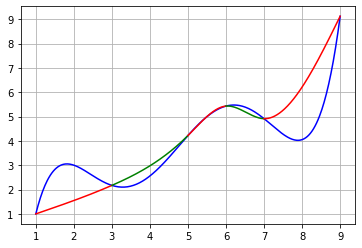

In [ ]:
x = [1, 3, 5, 6, 7, 9]
y = [1, 2.172, 4.22, 5.43, 4.912, 9.12]
m = 6
spline(m, x, y)

### Questão 4

a) Faça o diagrama de dispersão dos dados e observe que parece existir uma
relação linear entre a altura e o peso.

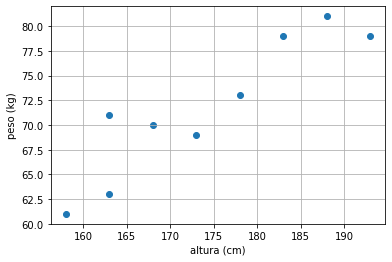

In [ ]:
x = [183, 173, 168, 188, 158, 163, 193, 163, 178]
y = [79, 69, 70, 81, 61, 63, 79, 71, 73]
plt.scatter(x, y)
plt.xlabel('altura (cm)')
plt.ylabel('peso (kg)')
plt.grid()
plt.show()

b) Ajuste uma reta que descreva o comportamento do peso em função da altura,
isto é, peso = f(altura).

a = 0.5275700934579439
b = -20.078037383177573


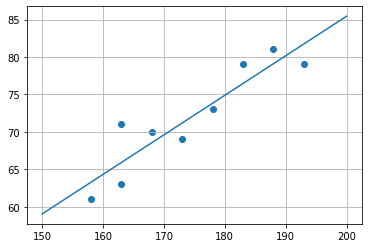

In [ ]:
MMQ(9, x, y, 150, 200)

c) Ajuste uma reta que descreva o comportamento da altura em função do peso,
isto é, altura = g(peso).

a = 1.5856741573033708
b = 60.29494382022473


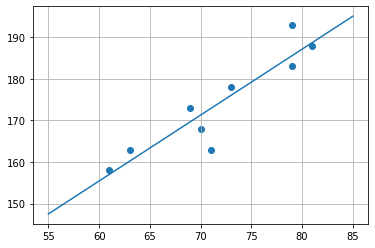

In [ ]:
MMQ(9, y, x, 55, 85)

d) Coloque em um gráfico as equações obtidas em b e c, compare-as.

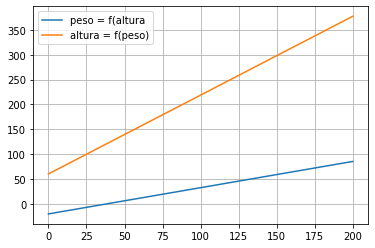

In [ ]:
a = 0.5275700934579439
b = -20.078037383177573
f = lambda x: a*x + b
curva1 = np.linspace(0, 200, 200)
valores1 = [f(valor) for valor in curva1]

a = 1.5856741573033708
b = 60.29494382022473
f = lambda x: a*x + b
curva2 = np.linspace(0, 200, 200)
valores2 = [f(valor) for valor in curva2]

plt.plot(curva1, valores1, linestyle='-', label='peso = f(altura')
plt.plot(curva2, valores2, linestyle='-', label='altura = f(peso)')
plt.legend()
plt.grid()
plt.show()